<a href="https://colab.research.google.com/github/yuyangweng/NLP/blob/main/NLP_RNN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

現在讓我們嘗試在IMDB電影評論分類問題上使用這種模型。 首先，我們預處理數據：

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
 
max_features = 10000  # 要考慮作為特徵的語詞數量
maxlen = 500  # 當句子的長度超過500個語詞的部份,就把它刪除掉
batch_size = 64
 
# 載入IMDB的資料
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
 
# 如果長度不夠的話就左端補空
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)  #(sample size, timesteps)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# input data shape (sample size, timesteps). Use label encoding, not one hot.##

#使用1個`Embedding`層和2個`LSTM`層來訓練一個簡單的循環網絡(`RNN`)：

Embedding嵌入層將正整數（下標）轉換為具有固定大小的向量，如[[4],[20]]->[[0.25,0.1],[0.6,-0.2]] (取代one-hot encoding)

Embedding層只能作為模型的第壹層

參數
input_dim：大或等於0的整數，字典長度，即輸入數據最大下標+1

output_dim：大於0的整數，代表全連接嵌入的維度

input_length：當輸入序列的長度固定時，該值為其長度。如果要在該層後接Flatten層，然後接Dense層，則必須指定該參數，否則Dense層的輸出維度無法自動推斷。

輸入shape
形如（samples，sequence_length=time steps）的2D張量

輸出shape
形如(samples, sequence_length, output_dim)的3D張量

https://keras-cn.readthedocs.io/en/latest/layers/embedding_layer/

https://www.jianshu.com/p/b2c33d7e56a5



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

model = Sequential()   # 輸入 （sample size，time steps） with label encoding              
model.add(Embedding(max_features, 8, input_length=500)) # => 參數(input features, output features, time steps)
model.add(Dropout(0.5)) # 承接 embedding 輸出 （sample size，time steps, output features） 
model.add(LSTM(16, return_sequences=True)) # 輸入 （sample size，time steps, input features） 
model.add(Dropout(0.5))
model.add(LSTM(8))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 8)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 500, 16)           1600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

我們用圖表來看一下模型在訓練(training)和驗證(validation)的損失(loss)和準確性(accuracy)：

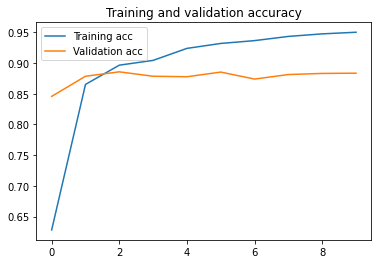

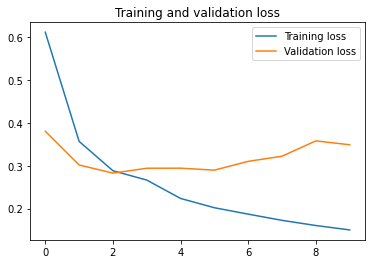

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用`LSTM`對這個數據集獲得了88.58％的測試精度。

---



### 參考: 
* [fchollet: deep-learning-with-python-notebooks (原文)](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb)
* [Keras官網](http://keras.io/)

*https://github.com/erhwenkuo

MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#使用1個`Embedding`層和2個`GRU`**層來訓練：**


In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 8, input_length=500))
model.add(Dropout(0.5))
model.add(GRU(16, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(8))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 500, 8)            0         
_________________________________________________________________
gru (GRU)                    (None, 500, 16)           1248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

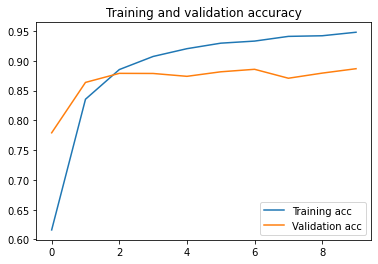

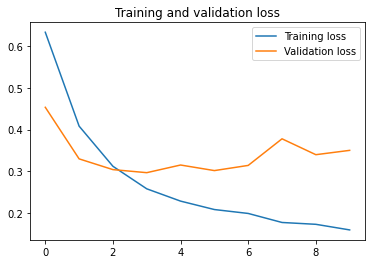

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用`GRU`對這個數據集獲得了88.66％的測試精度。




---

